In [24]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    %load_ext autoreload
%autoreload 2

In [25]:
from utils.core import Load_data
import pandas as pd
from Model.preprocessing.pipelines import Data_Process
from Model.preprocessing.datasetManager import DatasetManger
from Model.base.train import cross_validation
from Model.base.model import make_model
from Model.base.logger import LoggerManager
import tensorflow as tf
from Model.base.evaluator import  EvalutionClassifer, Drow
import os
import numpy as np

In [26]:
model_path = "./trained_model/10model0.keras"
dataset_pd = dataset_pd = pd.read_csv(
    "../dataset/FullDatasetAndWavlet.csv", index_col="annot_id")

dataset_pd.loc["125_"] = dataset_pd.loc["125_"].fillna(0.9)

column_interest = [
    'ti-rads_level',
    'original_ngtdm_Coarseness',
    'wavelet-HH_glcm_MaximumProbability',
    'wavelet-LH_glszm_LargeAreaHighGrayLevelEmphasis',
    'sex',
    'age',
    'size_x',
    'ti-rads_margin',
    'ti-rads_echogenicfoci',
    'wavelet-LH_glcm_SumEntropy',
    'original_firstorder_Kurtosis',
    'wavelet-LL_glszm_LargeAreaLowGrayLevelEmphasis',
    'wavelet-HL_firstorder_Energy',
    'size_y',
    'ti-rads_shape',
    'wavelet-HH_glrlm_RunLengthNonUniformityNormalized',
    'size_z',
    'wavelet-LL_glcm_MCC',
    'wavelet-HH_firstorder_Variance',
    'wavelet-HL_glszm_HighGrayLevelZoneEmphasis',
    'wavelet-HH_glszm_LargeAreaHighGrayLevelEmphasis',
    'original_firstorder_InterquartileRange',
    'wavelet-HL_glrlm_ShortRunLowGrayLevelEmphasis',
    'wavelet-HL_glszm_LargeAreaHighGrayLevelEmphasis',
    'original_firstorder_Skewness',
    'wavelet-LH_gldm_DependenceEntropy',
    'original_glszm_LargeAreaLowGrayLevelEmphasis',
    'wavelet-HH_glrlm_RunLengthNonUniformity',
    'original_shape2D_Sphericity',
    'wavelet-HL_firstorder_Median'
]

X = dataset_pd[column_interest]


Y = dataset_pd['histopath_diagnosis'].astype(np.float32)

batch_size = 32
test_size = 0.1


managerdataset = DatasetManger(
    X, Y, batch_size=batch_size, n_splits=2, test_size=test_size)
features_train, label_train, features_test, label_test = managerdataset.split()[0]

categorical_features = ["sex"]  # remvoed by mrmr "location"

numerical_features = ["ti-rads_level", "age"]

Ti_rads_featurea = ["ti-rads_margin", "ti-rads_shape",
                    "ti-rads_echogenicfoci"] 

numerical_features = list(X[X.columns[~X.columns.isin(categorical_features + Ti_rads_featurea)]].columns)

scaler = Data_Process(features_train, categorical_features, numerical_features, Ti_rads_featurea)
features_train = scaler.fit_transform()
features_test = scaler.transform(features_test)


set1 = managerdataset.convert_df_to_dataset(features_train, label_train)
set2 = managerdataset.convert_df_to_dataset(features_test, label_test)
METRICS = [
    tf.keras.metrics.BinaryAccuracy,
    tf.keras.metrics.Precision,
    tf.keras.metrics.Recall,
]

In [27]:
model = tf.keras.models.load_model(model_path)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 categorical__sex_Female (I  [(32, 1, 1)]                 0         []                            
 nputLayer)                                                                                       
                                                                                                  
 categorical__sex_Male (Inp  [(32, 1, 1)]                 0         []                            
 utLayer)                                                                                         
                                                                                                  
 num__ti-rads_level (InputL  [(32, 1, 1)]                 0         []                            
 ayer)                                                                                      

In [28]:
evaluator = EvalutionClassifer(
    [model], [set1])

In [29]:
evaluator.Calculate_metrics(METRICS, 0)

490/490 [==============================] - 1s 2ms/step


{'BinaryAccuracy': 0.97970647, 'Precision': 0.8511358, 'Recall': 0.9943535}

490/490 [==============================] - 1s 2ms/step


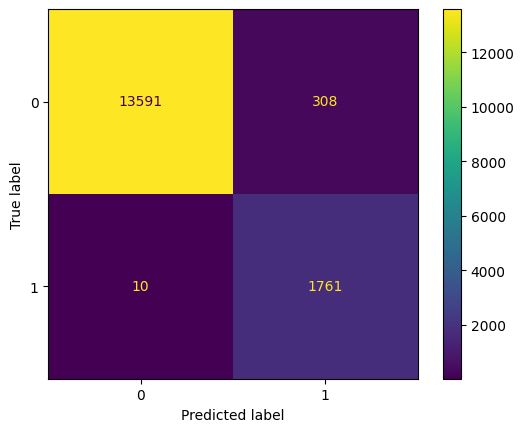

In [30]:
evaluator.Draw_Confusion_Matrics(0)

490/490 [==============================] - 1s 2ms/step


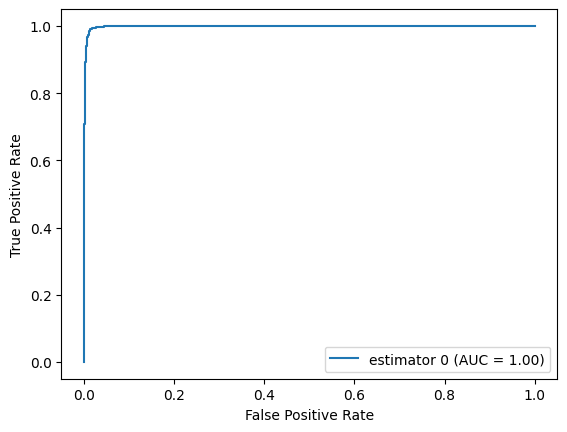

In [31]:
evaluator.Draw_ROC(0)